In [246]:
# pip install ucimlrepo

In [1]:
import pandas as pd
import numpy as np
import math

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

from scipy.stats import kurtosis, skew
from scipy.optimize import curve_fit
from ucimlrepo import fetch_ucirepo
from IPython.display import display

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

### Computer Hardware Investigation: CPU Performance
##### Source: https://archive.ics.uci.edu/dataset/29/computer+hardware
###### Citation: Feldmesser,Jacob. (1987). Computer Hardware. UCI Machine Learning Repository. https://doi.org/10.24432/C5830D.

In [306]:
df = fetch_ucirepo(id=29) 
print(type(df.data)) # dictionary
print(df.data.keys())

<class 'ucimlrepo.dotdict.dotdict'>
dict_keys(['ids', 'features', 'targets', 'original', 'headers'])


In [307]:
# metadata 
print(df.metadata)

{'uci_id': 29, 'name': 'Computer Hardware', 'repository_url': 'https://archive.ics.uci.edu/dataset/29/computer+hardware', 'data_url': 'https://archive.ics.uci.edu/static/public/29/data.csv', 'abstract': 'Relative CPU Performance Data, described in terms of its cycle time, memory size, etc.', 'area': 'Computer Science', 'tasks': ['Regression'], 'characteristics': ['Multivariate'], 'num_instances': 209, 'num_features': 10, 'feature_types': ['Integer'], 'demographics': [], 'target_col': None, 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1987, 'last_updated': 'Fri Oct 27 2023', 'dataset_doi': '10.24432/C5830D', 'creators': ['Jacob Feldmesser'], 'intro_paper': None, 'additional_info': {'summary': 'The estimated relative performance values were estimated by the authors using a linear regression method.  See their article (pp 308-313) for more details on how the relative performance values were set.', 'purpose': None, 'funded_by': N

In [308]:
print(f"IDs:\n{df.data.ids}\n") # blank
print(f"Features:\n{df.data.features.head(3)}\n") # dataframe
print(f"Targets:\n{df.data.targets}\n") # blank
print(f"Original:\n{df.data.original.head(3)}\n") # dataframe
print(f"Headers:\n{df.data.headers}\n") # column headings

IDs:
None

Features:
  VendorName ModelName  MYCT  MMIN   MMAX  CACH  CHMIN  CHMAX  PRP  ERP
0    adviser     32/60   125   256   6000   256     16    128  198  199
1     amdahl    470v/7    29  8000  32000    32      8     32  269  253
2     amdahl   470v/7a    29  8000  32000    32      8     32  220  253

Targets:
None

Original:
  VendorName ModelName  MYCT  MMIN   MMAX  CACH  CHMIN  CHMAX  PRP  ERP
0    adviser     32/60   125   256   6000   256     16    128  198  199
1     amdahl    470v/7    29  8000  32000    32      8     32  269  253
2     amdahl   470v/7a    29  8000  32000    32      8     32  220  253

Headers:
Index(['VendorName', 'ModelName', 'MYCT', 'MMIN', 'MMAX', 'CACH', 'CHMIN',
       'CHMAX', 'PRP', 'ERP'],
      dtype='object')



In [309]:
df.data.features == df.data.original # checking difference between Features and Original dfs

,VendorName,ModelName,MYCT,MMIN,MMAX,CACH,CHMIN,CHMAX,PRP,ERP
0,True,True,True,True,True,True,True,True,True,True
1,True,True,True,True,True,True,True,True,True,True
2,True,True,True,True,True,True,True,True,True,True
3,True,True,True,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...
204,True,True,True,True,True,True,True,True,True,True
205,True,True,True,True,True,True,True,True,True,True
206,True,True,True,True,True,True,True,True,True,True
207,True,True,True,True,True,True,True,True,True,True


In [310]:
df.data.features.equals(df.data.original) # confirming no difference between Features and Original

True

In [311]:
# since they are the same, update df var to contain the feature dataset
df = df.data.features 
df

,VendorName,ModelName,MYCT,MMIN,MMAX,CACH,CHMIN,CHMAX,PRP,ERP
0,adviser,32/60,125,256,6000,256,16,128,198,199
1,amdahl,470v/7,29,8000,32000,32,8,32,269,253
2,amdahl,470v/7a,29,8000,32000,32,8,32,220,253
3,amdahl,470v/7b,29,8000,32000,32,8,32,172,253
4,amdahl,470v/7c,29,8000,16000,32,8,16,132,132
...,...,...,...,...,...,...,...,...,...,...
204,sperry,80/8,124,1000,8000,0,1,8,42,37
205,sperry,90/80-model-3,98,1000,8000,32,2,8,46,50
206,sratus,32,125,2000,8000,0,2,14,52,41
207,wang,vs-100,480,512,8000,32,0,0,67,47


In [312]:
df.info() # checking for nulls, checking datatypes within each col

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209 entries, 0 to 208
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   VendorName  209 non-null    object
 1   ModelName   209 non-null    object
 2   MYCT        209 non-null    int64 
 3   MMIN        209 non-null    int64 
 4   MMAX        209 non-null    int64 
 5   CACH        209 non-null    int64 
 6   CHMIN       209 non-null    int64 
 7   CHMAX       209 non-null    int64 
 8   PRP         209 non-null    int64 
 9   ERP         209 non-null    int64 
dtypes: int64(8), object(2)
memory usage: 16.5+ KB


In [313]:
df.shape

(209, 10)

In [314]:
# any duplicated rows?
df[df.duplicated()] # there are none

,VendorName,ModelName,MYCT,MMIN,MMAX,CACH,CHMIN,CHMAX,PRP,ERP


In [315]:
print(df.VendorName.unique())
df.VendorName.nunique()

['adviser' 'amdahl' 'apollo' 'basf' 'bti' 'burroughs' 'c.r.d' 'cdc'
 'cambex' 'dec' 'dg' 'formation' 'four-phase' 'gould' 'hp' 'harris'
 'honeywell' 'ibm' 'ipl' 'magnuson' 'microdata' 'nas' 'ncr' 'nixdorf'
 'perkin-elmer' 'prime' 'siemens' 'sperry' 'sratus' 'wang']


30

In [316]:
df["VendorName"] = df["VendorName"].str.upper()

In [317]:
vendor_counts = df.VendorName.value_counts()
vendor_counts.head() # most popular: Vendor Names that occur the most in this dataset

VendorName
IBM          32
NAS          19
NCR          13
SPERRY       13
HONEYWELL    13
Name: count, dtype: int64

##### Column (Variable) Information:
1. vendor name: 30 
      (adviser, amdahl,apollo, basf, bti, burroughs, c.r.d, cambex, cdc, dec, 
       dg, formation, four-phase, gould, honeywell, hp, ibm, ipl, magnuson, 
       microdata, nas, ncr, nixdorf, perkin-elmer, prime, siemens, sperry, 
       sratus, wang)
2. Model Name: many unique symbols
3. MYCT: machine cycle time in nanoseconds (integer)
4. MMIN: minimum main memory in kilobytes (integer)
5. MMAX: maximum main memory in kilobytes (integer)
6. CACH: cache memory in kilobytes (integer)
7. CHMIN: minimum channels in units (integer)
8. CHMAX: maximum channels in units (integer)
9. PRP: published relative performance (integer)
10. ERP: estimated relative performance from the original article (integer)

Our target:<br>
PRP <br>
<br>
The predictions (made using linear regression by creators of article):<br>
ERP

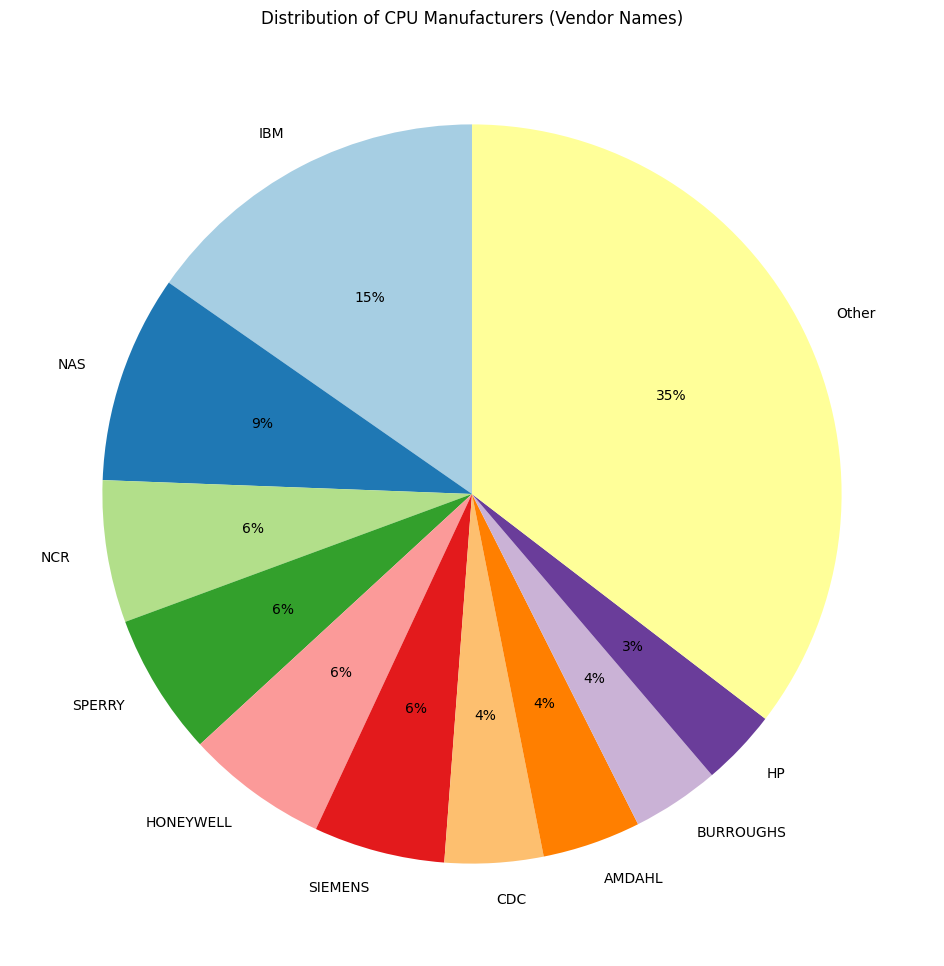

In [318]:
mostpopular_manufacturers = vendor_counts.head(10)
other_count = vendor_counts.iloc[10:].sum()
mostpopular_manufacturers['Other'] = other_count

plt.figure(figsize=(12, 12))
plt.pie(mostpopular_manufacturers, labels=mostpopular_manufacturers.index, autopct='%1.0f%%', startangle = 90, colors = sns.color_palette("Paired"))
plt.title('Distribution of CPU Manufacturers (Vendor Names)')
plt.show()

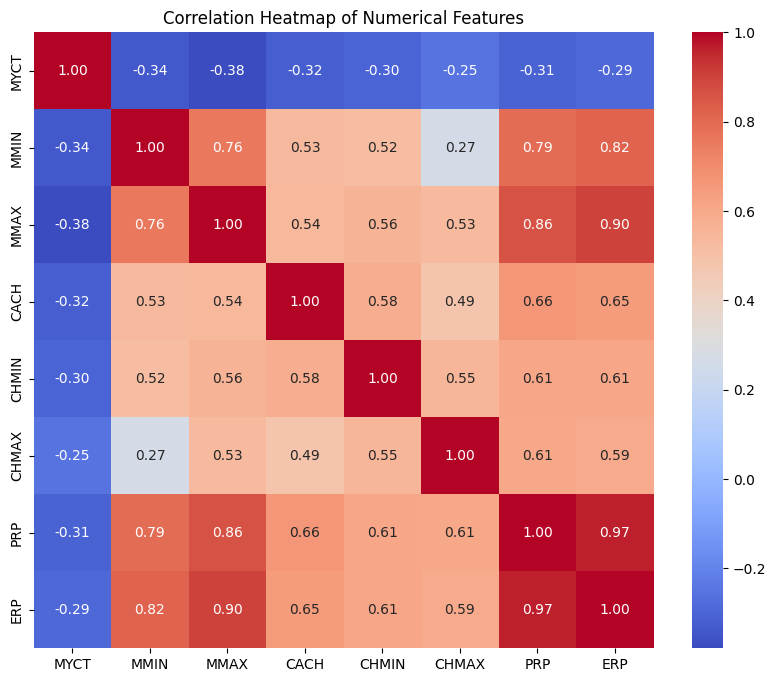

In [319]:
corr_matrix = df.drop(columns=["VendorName", "ModelName"]).corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

Pertaining to the heatmap above, keep in mind: target feature is PRP, and ERP is a linear regression prediction of PRP.<br>
Hence, there would be multicollinearity (i.e., linear dependency) between PRP and ERP.<br>
Intuitively, there would also be multicollinearity between MMIN and MMAX, and CHMIN and CHMAX.<br>
We will choose to visualize the following pairs of variables due to the pairs having a positive and negative correlation respectively:<br> 
 1) MMAX and PRP
 2) MMAX and MYCT

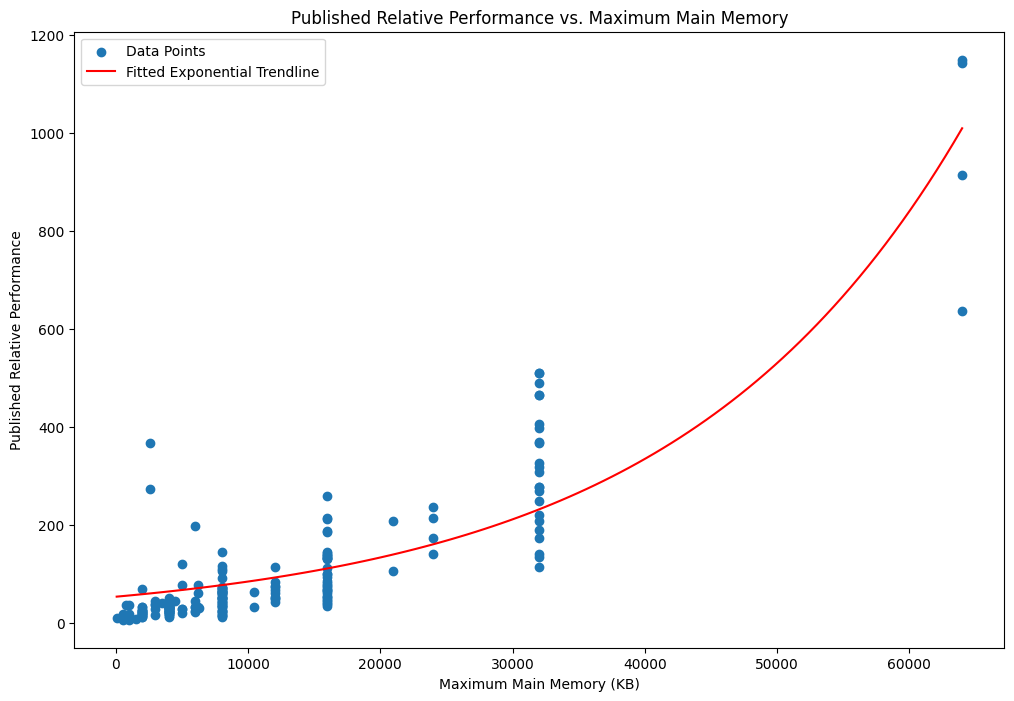

In [320]:
def exponential_func(x, a, b):
    """Creating a function that will compute output values
    for a mathematical exponential function, as both the 
    pairs of variables we chose to visualize appear to have 
    exponential patterns."""
    return a*b**x # formula for exponential function, y = a*b^x

popt, _ = curve_fit(exponential_func, df['MMAX'], df['PRP'])  # fitting an exponential curve to the scatter points, due to visible trend
x_values = np.linspace(df['MMAX'].min(), df['MMAX'].max(), 100) # x values for trendline
y_values = exponential_func(x_values, *popt)   # y values for trendline, using exponential_func we created

plt.figure(figsize=(12, 8))
plt.scatter(df['MMAX'], df['PRP'], label='Data Points')
plt.plot(x_values, y_values, color='red', label='Fitted Exponential Trendline')
plt.title('Published Relative Performance vs. Maximum Main Memory')
plt.xlabel('Maximum Main Memory (KB)')
plt.ylabel('Published Relative Performance')
plt.legend()
plt.show()

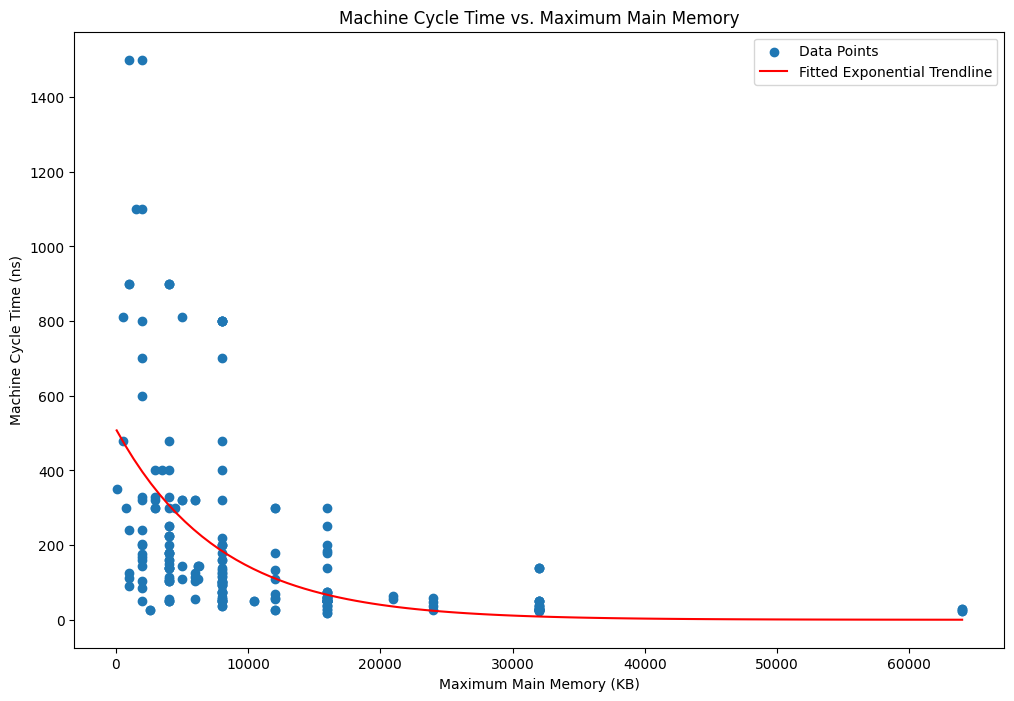

In [321]:
popt, _ = curve_fit(exponential_func, df['MMAX'], df['MYCT'])  # fitting an exponential curve to the scatter points, due to visible trend
x_values = np.linspace(df['MMAX'].min(), df['MMAX'].max(), 100) # x values for trendline
y_values = exponential_func(x_values, *popt)   # y values for trendline, using exponential_func we created

plt.figure(figsize=(12, 8))
plt.scatter(df['MMAX'], df['MYCT'], label='Data Points')
plt.plot(x_values, y_values, color='red', label='Fitted Exponential Trendline')
plt.title('Machine Cycle Time vs. Maximum Main Memory')
plt.xlabel('Maximum Main Memory (KB)')
plt.ylabel('Machine Cycle Time (ns)')
plt.legend()
plt.show()

In [322]:
# CPU manufacturers with most rows in this dataset
vendors_popular5 = df.VendorName.value_counts().nlargest(5).index # same as slicing: df.VendorName.value_counts()[:5].index
df_vendors_pop5 = df[df.VendorName.isin(vendors_popular5)]
df_vendors_pop5

,VendorName,ModelName,MYCT,MMIN,MMAX,CACH,CHMIN,CHMAX,PRP,ERP
80,HONEYWELL,dps:6/35,330,1000,3000,0,2,4,16,23
81,HONEYWELL,dps:6/92,300,1000,4000,8,3,64,38,30
82,HONEYWELL,dps:6/96,300,1000,16000,8,2,112,38,73
83,HONEYWELL,dps:7/35,330,1000,2000,0,1,2,16,20
84,HONEYWELL,dps:7/45,330,1000,4000,0,3,6,22,25
...,...,...,...,...,...,...,...,...,...,...
201,SPERRY,80/4,180,512,4000,0,1,3,14,24
202,SPERRY,80/5,180,262,4000,0,1,3,18,24
203,SPERRY,80/6,180,512,4000,0,1,3,21,24
204,SPERRY,80/8,124,1000,8000,0,1,8,42,37


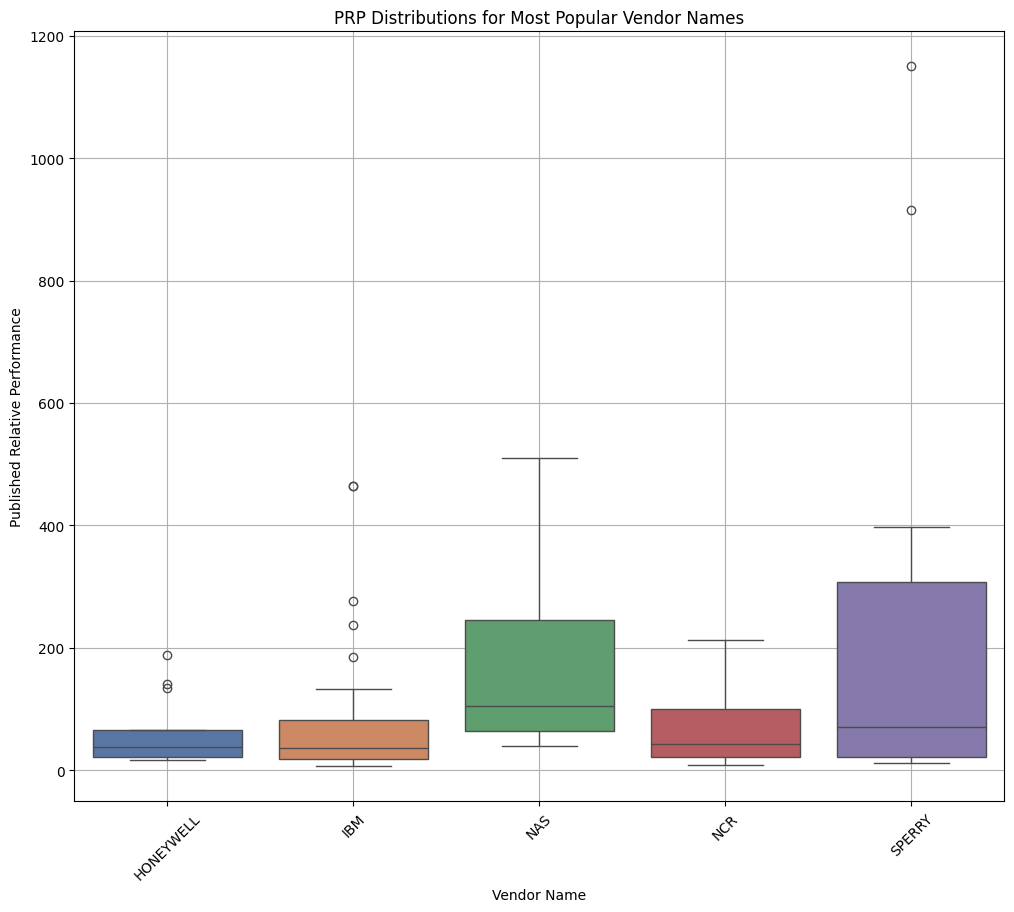

In [323]:
# boxplots comparing the PRP of the 5 most popular CPU manufacturers in this dataset
plt.figure(figsize=(12, 10))
sns.boxplot(x='VendorName', y='PRP', data=df_vendors_pop5, hue="VendorName", palette="deep")
plt.title('PRP Distributions for Most Popular Vendor Names')
plt.xlabel('Vendor Name')
plt.ylabel('Published Relative Performance')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [324]:
df.columns

Index(['VendorName', 'ModelName', 'MYCT', 'MMIN', 'MMAX', 'CACH', 'CHMIN',
       'CHMAX', 'PRP', 'ERP'],
      dtype='object')

Now, shifting from investigating PRP of the most popular manufacturers, we want to investigate the PRP of the best performing manufacturers.<br>

In [325]:
df_VendorAvg = df.drop(columns=["ModelName"]).groupby("VendorName").mean().reset_index()
df_VendorAvg

,VendorName,MYCT,MMIN,MMAX,CACH,CHMIN,CHMAX,PRP,ERP
0,ADVISER,125.000000,256.000000,6000.000000,256.000000,16.000000,128.000000,198.000000,199.000000
1,AMDAHL,26.000000,13333.333333,37333.333333,56.888889,13.333333,33.777778,416.333333,436.666667
2,APOLLO,400.000000,756.000000,3250.000000,2.000000,1.000000,4.000000,39.000000,23.500000
3,BASF,55.000000,3000.000000,12000.000000,65.000000,1.000000,8.000000,115.000000,93.500000
4,BTI,275.000000,288.000000,8032.000000,0.000000,2.500000,18.000000,22.500000,39.500000
5,BURROUGHS,137.750000,2129.500000,4862.500000,18.750000,5.750000,38.375000,49.750000,44.625000
6,C.R.D,320.000000,320.000000,4500.000000,2.666667,1.000000,5.833333,42.666667,25.666667
7,CAMBEX,50.000000,1600.000000,12000.000000,8.000000,3.000000,5.400000,42.800000,58.600000
8,CDC,46.666667,2426.666667,9126.666667,45.111111,8.333333,17.555556,130.111111,80.222222
9,DEC,401.000000,756.000000,6918.666667,6.333333,1.666667,6.500000,47.333333,35.833333


In [326]:
df_VendorAvg.sort_values(by="PRP", ascending=False, inplace=True)
df_top_5_avg = df_VendorAvg[:5].reset_index(drop=True)
df_top_5_avg

,VendorName,MYCT,MMIN,MMAX,CACH,CHMIN,CHMAX,PRP,ERP
0,AMDAHL,26.000000,13333.333333,37333.333333,56.888889,13.333333,33.777778,416.333333,436.666667
1,SPERRY,101.384615,2426.769231,22769.230769,44.923077,13.230769,53.384615,254.923077,249.692308
2,ADVISER,125.000000,256.000000,6000.000000,256.000000,16.000000,128.000000,198.000000,199.000000
3,GOULD,75.000000,2000.000000,13333.333333,85.333333,1.000000,38.000000,182.333333,115.000000
4,NAS,64.421053,5368.421053,17894.736842,55.052632,5.684211,13.473684,176.894737,159.105263


In [327]:
top5_VendorNames = df_top_5_avg.VendorName.to_list()
print(top5_VendorNames)
df_top5 = df[df.VendorName.isin(top5_VendorNames)]
df_top5.head(3)

['AMDAHL', 'SPERRY', 'ADVISER', 'GOULD', 'NAS']


,VendorName,ModelName,MYCT,MMIN,MMAX,CACH,CHMIN,CHMAX,PRP,ERP
0,ADVISER,32/60,125,256,6000,256,16,128,198,199
1,AMDAHL,470v/7,29,8000,32000,32,8,32,269,253
2,AMDAHL,470v/7a,29,8000,32000,32,8,32,220,253


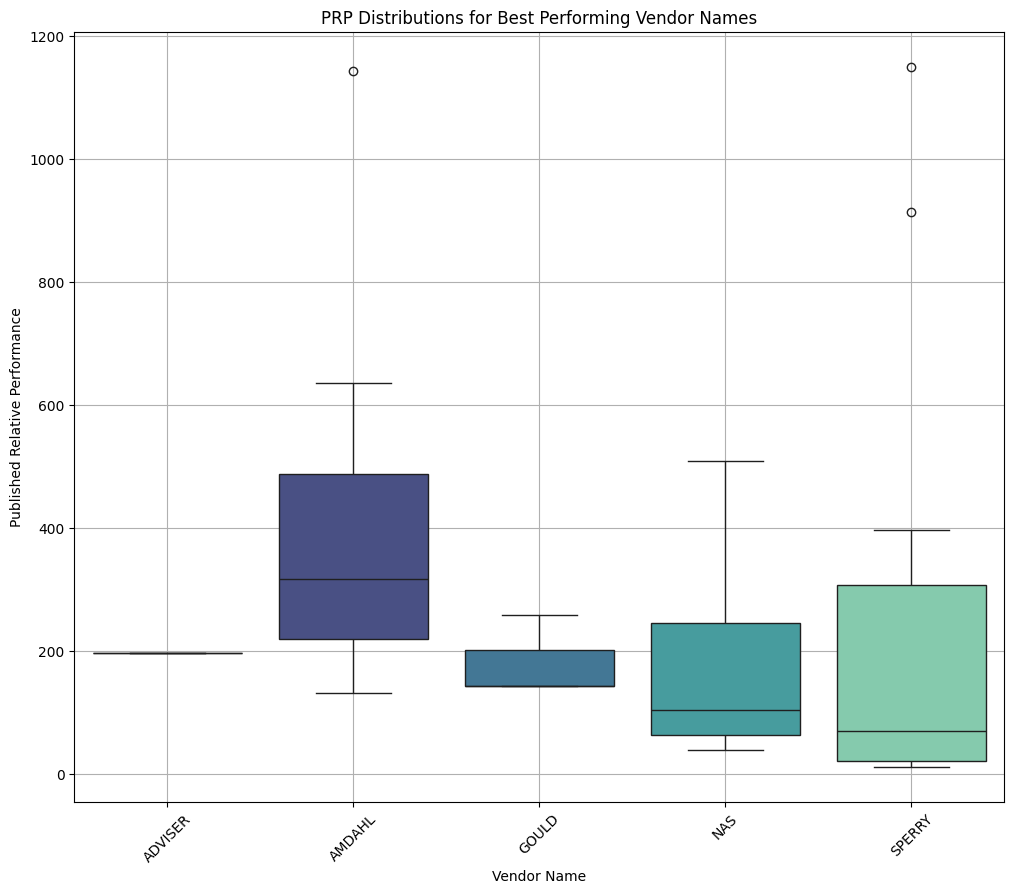

In [328]:
# boxplots comparing the PRP of the 5 best performing CPU manufacturers in this dataset
plt.figure(figsize=(12, 10))
sns.boxplot(x='VendorName', y='PRP', data=df_top5, hue="VendorName", palette="mako")
plt.title('PRP Distributions for Best Performing Vendor Names')
plt.xlabel('Vendor Name')
plt.ylabel('Published Relative Performance')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

Note that NAS and SPERRY are the only 2 Vendor Names that are in the top 5 for both most popular and best performing Vendor Names. <br>

In [329]:
df.describe()

,MYCT,MMIN,MMAX,CACH,CHMIN,CHMAX,PRP,ERP
count,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000
mean,203.822967,2867.980861,11796.153110,25.205742,4.698565,18.267943,105.622010,99.330144
std,260.262926,3878.742758,11726.564377,40.628722,6.816274,25.997318,160.830733,154.757102
min,17.000000,64.000000,64.000000,0.000000,0.000000,0.000000,6.000000,15.000000
25%,50.000000,768.000000,4000.000000,0.000000,1.000000,5.000000,27.000000,28.000000
50%,110.000000,2000.000000,8000.000000,8.000000,2.000000,8.000000,50.000000,45.000000
75%,225.000000,4000.000000,16000.000000,32.000000,6.000000,24.000000,113.000000,101.000000
max,1500.000000,32000.000000,64000.000000,256.000000,52.000000,176.000000,1150.000000,1238.000000


In [330]:
def stats(t): # takes a df, returns detailed statistical info about column distributions
    numeric_col_list = t.select_dtypes(include=["number"]).columns
    mean_list, median_list, mode_list, range_list, iqr_list, variance_list, is_skew_list, skew_val_list, kurt_list, cv_list = [], [], [], [], [], [], [], [], [], []
    
    for i in numeric_col_list:
        mean_list.append(np.mean(t[i]))
        median_list.append(np.median(t[i]))
        mode_list.append(t[i].mode()[0])
        range_list.append(t[i].max()-t[i].min())
        iqr_list.append(t[i].quantile([0.75])[0.75]-t[i].quantile([0.25])[0.25])
        variance_list.append(t[i].var())
        if np.mean(t[i])>np.median(t[i]) and np.median(t[i])>t[i].mode()[0]:
            is_skew_list.append("Right") # right skewed
        elif np.mean(t[i])<np.median(t[i]) and np.median(t[i])<t[i].mode()[0]:
            is_skew_list.append("Left") # left skewed
        else:
            is_skew_list.append("NA") # not skewed
        skew_val_list.append(skew(t[i]))  # skewness/asymmetry of distribution
        kurt_list.append(kurtosis(t[i]))  # tailedness of distribution
        cv_list.append(t[i].std()/t[i].mean()*100)  # percent: std_dev/mean

    dictionary = {"Numerical Columns": numeric_col_list, 
                  "Mean": mean_list, 
                  "Median": median_list, 
                  "Mode": mode_list,
                  "Range": range_list,
                  "IQR": iqr_list,
                  "Variance": variance_list,
                  "Skew Direction": is_skew_list,
                  "Skew Value": skew_val_list,
                  "Kurtosis": kurt_list,
                  "Coeff of Var": cv_list}
    return pd.DataFrame(dictionary)
        
df_stats = stats(df)
df_stats

,Numerical Columns,Mean,Median,Mode,Range,IQR,Variance,Skew Direction,Skew Value,Kurtosis,Coeff of Var
0,MYCT,203.822967,110.0,50,1483,175.0,6.773679e+04,Right,2.525857,6.866358,127.690677
1,MMIN,2867.980861,2000.0,2000,31936,3232.0,1.504465e+07,NA,3.490649,17.166146,135.242979
2,MMAX,11796.153110,8000.0,8000,63936,12000.0,1.375123e+08,NA,2.125268,5.733634,99.410073
3,CACH,25.205742,8.0,0,256,32.0,1.650693e+03,Right,2.804463,10.005560,161.188361
4,CHMIN,4.698565,2.0,1,52,5.0,4.646158e+01,Right,3.998371,21.906383,145.071401
5,CHMAX,18.267943,8.0,6,176,19.0,6.758606e+02,Right,3.570046,15.481950,142.311145
6,PRP,105.622010,50.0,32,1144,86.0,2.586652e+04,Right,3.864820,18.766111,152.270094
7,ERP,99.330144,45.0,28,1223,73.0,2.394976e+04,Right,4.273072,22.513998,155.800744


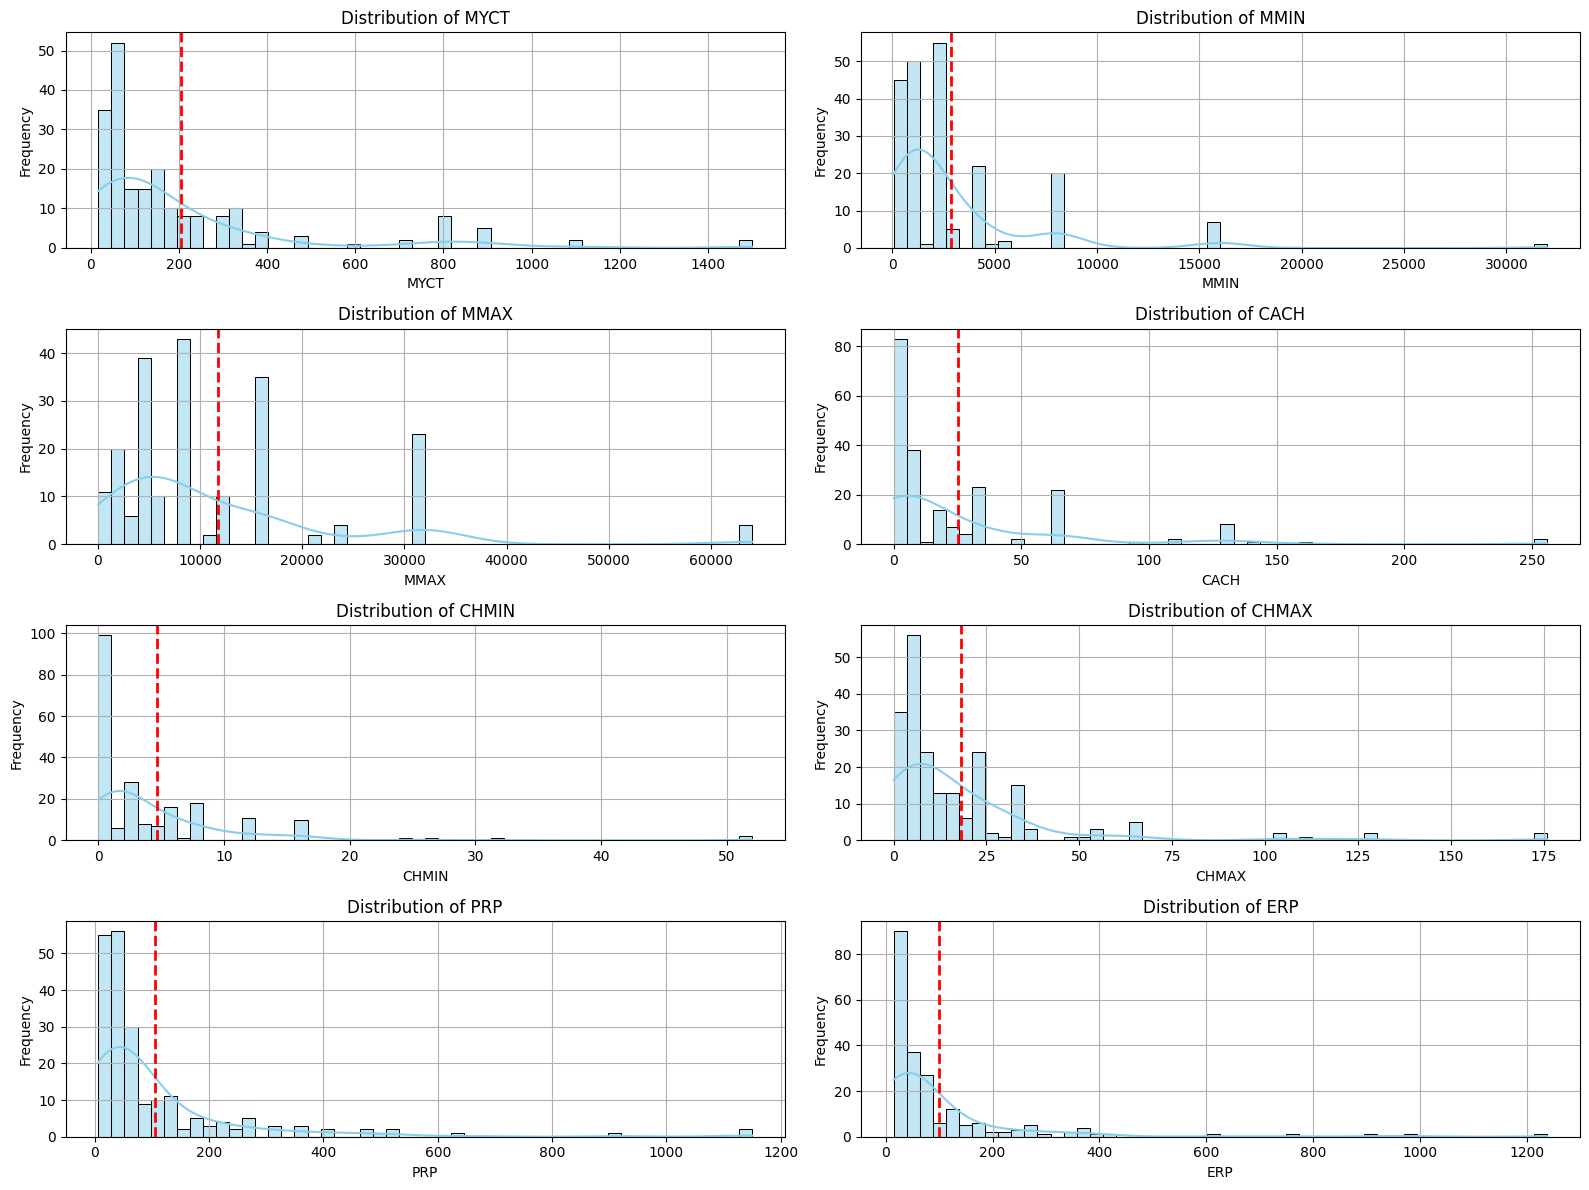

In [331]:
# we will make histograms showing distributions of all numerical variables
numeric_cols = df.select_dtypes(include=["number"]).columns

plt.figure(figsize=(16, 12))
for i, col in enumerate(numeric_cols):
    plt.subplot(len(numeric_cols)//2, 2, i+1) # rows, cols, index
    sns.histplot(df[col], kde=True, bins=50, color='skyblue')
    plt.axvline(df[col].mean(), color='red', linestyle='dashed', linewidth=2) # average (mean) of each distribution is marked by red line
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.grid(True)

plt.tight_layout()
plt.show()

In [332]:
df_cv_sorted = df_stats.sort_values(by="Coeff of Var")
df_cv_sorted

,Numerical Columns,Mean,Median,Mode,Range,IQR,Variance,Skew Direction,Skew Value,Kurtosis,Coeff of Var
2,MMAX,11796.153110,8000.0,8000,63936,12000.0,1.375123e+08,NA,2.125268,5.733634,99.410073
0,MYCT,203.822967,110.0,50,1483,175.0,6.773679e+04,Right,2.525857,6.866358,127.690677
1,MMIN,2867.980861,2000.0,2000,31936,3232.0,1.504465e+07,NA,3.490649,17.166146,135.242979
5,CHMAX,18.267943,8.0,6,176,19.0,6.758606e+02,Right,3.570046,15.481950,142.311145
4,CHMIN,4.698565,2.0,1,52,5.0,4.646158e+01,Right,3.998371,21.906383,145.071401
6,PRP,105.622010,50.0,32,1144,86.0,2.586652e+04,Right,3.864820,18.766111,152.270094
7,ERP,99.330144,45.0,28,1223,73.0,2.394976e+04,Right,4.273072,22.513998,155.800744
3,CACH,25.205742,8.0,0,256,32.0,1.650693e+03,Right,2.804463,10.005560,161.188361


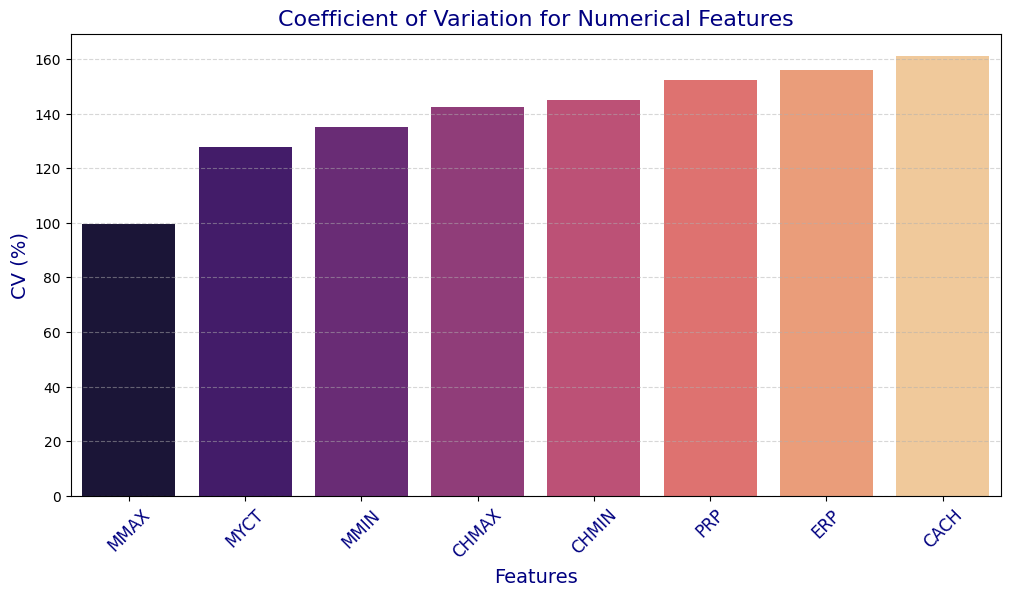

In [333]:
# Investigating which features have the greatest amount of dispersion from the mean of their respective distributions
plt.figure(figsize=(12, 6))
sns.barplot(x="Numerical Columns", y="Coeff of Var", data=df_cv_sorted, hue="Numerical Columns", legend=False, palette="magma")
plt.title('Coefficient of Variation for Numerical Features', fontsize=16, color='navy')
plt.xticks(rotation=45, fontsize=12, color='navy')
plt.ylabel('CV (%)', fontsize=14, color='navy')
plt.xlabel('Features', fontsize=14, color='navy')
plt.grid(True, axis='y', linestyle='--', alpha=0.5)
plt.show()

In [334]:
df_top5.head()

,VendorName,ModelName,MYCT,MMIN,MMAX,CACH,CHMIN,CHMAX,PRP,ERP
0,ADVISER,32/60,125,256,6000,256,16,128,198,199
1,AMDAHL,470v/7,29,8000,32000,32,8,32,269,253
2,AMDAHL,470v/7a,29,8000,32000,32,8,32,220,253
3,AMDAHL,470v/7b,29,8000,32000,32,8,32,172,253
4,AMDAHL,470v/7c,29,8000,16000,32,8,16,132,132


In [335]:
# Investigate the discrepancies between ERP (estimated performance achieved by linear regression) and PRP (published performance, our target variable)
# Looking at our top 5 best performing Vendor Names
df_melted = pd.melt(df_top5, id_vars=['VendorName'], value_vars=['PRP', 'ERP'], 
                    var_name='PerformanceType', value_name='PerformanceValue')
df_melted

,VendorName,PerformanceType,PerformanceValue
0,ADVISER,PRP,198
1,AMDAHL,PRP,269
2,AMDAHL,PRP,220
3,AMDAHL,PRP,172
4,AMDAHL,PRP,132
...,...,...,...
85,SPERRY,ERP,24
86,SPERRY,ERP,24
87,SPERRY,ERP,24
88,SPERRY,ERP,37


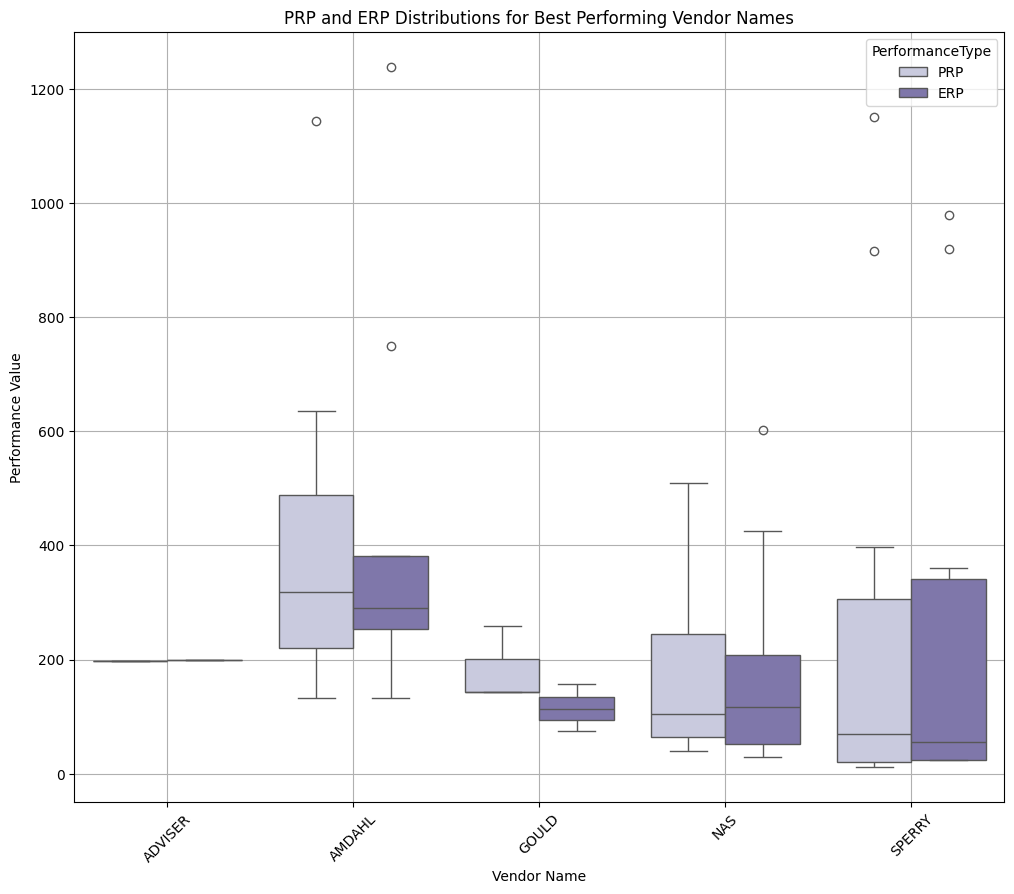

In [336]:
# boxplots comparing the ERP with the PRP for the 5 best performing CPU manufacturers in this dataset
plt.figure(figsize=(12, 10))
sns.boxplot(x='VendorName', y='PerformanceValue', hue='PerformanceType', data=df_melted, palette='Purples')
plt.title('PRP and ERP Distributions for Best Performing Vendor Names')
plt.xlabel('Vendor Name')
plt.ylabel('Performance Value')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

The medians of the ERP predictions achieved by linear regression (done by the creators of the article from which this dataset is sourced) <br>
are quite good, except for GOULD, which is significantly off. The upper and lower quartiles being misaligned show some discrepancy <br>
between the ERP predictions and the PRP values (groud truth).
The predictions appear reasonably good on average.

#### Now, we will build our predictive models using Ridge Regression, Lasso Regression, Decision Trees, and Random Forests.

Without implementing the models yet, we already know that Ridge Regression should be a good choice for this dataset <br>
due to the multicollinearity present, which Ridge Regression is robust to and can handle well.

In [337]:
df

,VendorName,ModelName,MYCT,MMIN,MMAX,CACH,CHMIN,CHMAX,PRP,ERP
0,ADVISER,32/60,125,256,6000,256,16,128,198,199
1,AMDAHL,470v/7,29,8000,32000,32,8,32,269,253
2,AMDAHL,470v/7a,29,8000,32000,32,8,32,220,253
3,AMDAHL,470v/7b,29,8000,32000,32,8,32,172,253
4,AMDAHL,470v/7c,29,8000,16000,32,8,16,132,132
...,...,...,...,...,...,...,...,...,...,...
204,SPERRY,80/8,124,1000,8000,0,1,8,42,37
205,SPERRY,90/80-model-3,98,1000,8000,32,2,8,46,50
206,SRATUS,32,125,2000,8000,0,2,14,52,41
207,WANG,vs-100,480,512,8000,32,0,0,67,47


In [338]:
X = df.drop(columns=["VendorName", "ModelName", "PRP", "ERP"]) # our features/predictors/variables
X

,MYCT,MMIN,MMAX,CACH,CHMIN,CHMAX
0,125,256,6000,256,16,128
1,29,8000,32000,32,8,32
2,29,8000,32000,32,8,32
3,29,8000,32000,32,8,32
4,29,8000,16000,32,8,16
...,...,...,...,...,...,...
204,124,1000,8000,0,1,8
205,98,1000,8000,32,2,8
206,125,2000,8000,0,2,14
207,480,512,8000,32,0,0


In [339]:
y = df['PRP']
y

0      198
1      269
2      220
3      172
4      132
      ... 
204     42
205     46
206     52
207     67
208     45
Name: PRP, Length: 209, dtype: int64

In [340]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[-0.30358614, -0.67502598, -0.49546221,  5.69420785,  1.66198873,
         4.23103334],
       [-0.67332952,  1.32629082,  1.72704937,  0.16762947,  0.48550899,
         0.52947875],
       [-0.67332952,  1.32629082,  1.72704937,  0.16762947,  0.48550899,
         0.52947875],
       ...,
       [-0.30358614, -0.2243162 , -0.32449978, -0.62188173, -0.39685082,
        -0.16456273],
       [ 1.06369405, -0.60886675, -0.32449978,  0.16762947, -0.69097076,
        -0.70437278],
       [ 1.06369405, -0.48275071, -0.66642464, -0.62188173, -0.69097076,
        -0.70437278]])

In [341]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape


((167, 6), (42, 6))

In [342]:
# implementing Ridge Regression with various values for alpha (regularization strength)
# searching for the alpha value that gives best R-squared value (closest to 1)
for i in np.arange(1,10,0.5):
  ridge_reg = Ridge(alpha=i)  # the hyperparameter alpha is tuned to i
  ridge_reg.fit(X_train, y_train)
  y_train_pred = ridge_reg.predict(X_train)
  y_test_pred = ridge_reg.predict(X_test)

  train_mse = mean_squared_error(y_train, y_train_pred)
  test_mse = mean_squared_error(y_test, y_test_pred)
  train_r2 = r2_score(y_train, y_train_pred)
  test_r2 = r2_score(y_test, y_test_pred)

  print(f"alpha is {i}:")
  print(f"Training MSE:\t{train_mse:.3f}\nTraining R^2:\t{train_r2:.3f}")
  print(f"Test MSE:\t{test_mse:.3f}\nTest R^2:\t{test_r2:.3f}\n")

alpha is 1.0:
Training MSE:	3118.006
Training R^2:	0.838
Test MSE:	5674.654
Test R^2:	0.889

alpha is 1.5:
Training MSE:	3118.430
Training R^2:	0.838
Test MSE:	5695.815
Test R^2:	0.888

alpha is 2.0:
Training MSE:	3119.014
Training R^2:	0.838
Test MSE:	5717.207
Test R^2:	0.888

alpha is 2.5:
Training MSE:	3119.751
Training R^2:	0.838
Test MSE:	5738.817
Test R^2:	0.887

alpha is 3.0:
Training MSE:	3120.637
Training R^2:	0.838
Test MSE:	5760.635
Test R^2:	0.887

alpha is 3.5:
Training MSE:	3121.667
Training R^2:	0.838
Test MSE:	5782.651
Test R^2:	0.886

alpha is 4.0:
Training MSE:	3122.835
Training R^2:	0.838
Test MSE:	5804.856
Test R^2:	0.886

alpha is 4.5:
Training MSE:	3124.136
Training R^2:	0.837
Test MSE:	5827.240
Test R^2:	0.886

alpha is 5.0:
Training MSE:	3125.567
Training R^2:	0.837
Test MSE:	5849.795
Test R^2:	0.885

alpha is 5.5:
Training MSE:	3127.123
Training R^2:	0.837
Test MSE:	5872.513
Test R^2:	0.885

alpha is 6.0:
Training MSE:	3128.800
Training R^2:	0.837
Test MSE:	589

In [343]:
ridge_reg = Ridge(alpha=1)  # the chosen value for the hyperparameter alpha: 1
ridge_reg.fit(X_train, y_train)
y_train_pred = ridge_reg.predict(X_train)
y_test_pred = ridge_reg.predict(X_test)

train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print(f"Training MSE:\t{train_mse:.3f}\nTraining R^2:\t{train_r2:.3f}")
print(f"Test MSE:\t{test_mse:.3f}\nTest R^2:\t{test_r2:.3f}")

Training MSE:	3118.006
Training R^2:	0.838
Test MSE:	5674.654
Test R^2:	0.889


In [344]:
df_y_pred = pd.DataFrame({"PRP Predictions": y_test_pred})
df_y_pred[7:27] # we see there are some negative values predicted for PRP, but this is not possible, so we will process the predictions to disallow negatives

,PRP Predictions
7,-17.732598
8,867.314682
9,278.188780
10,109.703372
11,130.446898
12,45.938254
13,37.275343
14,105.593884
15,25.658656
16,115.677503


In [345]:
y_train_pred = np.maximum(y_train_pred, 0) # ensure we achieve non-negative predictions
y_test_pred = np.maximum(y_test_pred, 0)

train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print(f"Training MSE:\t{train_mse:.3f}\nTraining R^2:\t{train_r2:.3f}")
print(f"Test MSE:\t{test_mse:.3f}\nTest R^2:\t{test_r2:.3f}")

Training MSE:	3051.405
Training R^2:	0.841
Test MSE:	5595.763
Test R^2:	0.890


In [346]:
lasso = Lasso(alpha=1)  # alpha is regularization strength
lasso.fit(X_train, y_train)

y_train_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test)
y_train_pred = np.maximum(y_train_pred, 0) # ensure non-negative predictions
y_test_pred = np.maximum(y_test_pred, 0)

train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print(f"Training MSE:\t{train_mse:.3f}\nTraining R^2:\t{train_r2:.3f}")
print(f"Test MSE:\t{test_mse:.3f}\nTest R^2:\t{test_r2:.3f}")

Training MSE:	3063.610
Training R^2:	0.841
Test MSE:	5733.517
Test R^2:	0.887


In [347]:
tree_model = DecisionTreeRegressor(random_state=42)
tree_model.fit(X_train, y_train)

y_train_pred = tree_model.predict(X_train)
y_test_pred = tree_model.predict(X_test)

train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

print(f"Training MSE:\t{train_mse:.3f}\nTraining R^2:\t{train_r2:.3f}")
print(f"Test MSE:\t{test_mse:.3f}\nTest R^2:\t{test_r2:.3f}")

Training MSE:	84.288
Training R^2:	0.996
Test MSE:	9364.792
Test R^2:	0.816


In [348]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

y_train_pred = rf_model.predict(X_train)
y_test_pred = rf_model.predict(X_test)

train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

print(f"Training MSE:\t{train_mse:.3f}\nTraining R^2:\t{train_r2:.3f}")
print(f"Test MSE:\t{test_mse:.3f}\nTest R^2:\t{test_r2:.3f}")

Training MSE:	881.808
Training R^2:	0.954
Test MSE:	6603.908
Test R^2:	0.870


### Our Best Model:
### Ridge Regression with Processed Results Disallowing Negative Prediction Values for PRP

In [349]:
ridge_reg = Ridge(alpha=1)  # the chosen value for the hyperparameter alpha: 1
ridge_reg.fit(X_train, y_train)
y_train_pred = np.maximum(ridge_reg.predict(X_train), 0) # np.maximum will ensure we don't get negatives
y_test_pred = np.maximum(ridge_reg.predict(X_test), 0)

train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print("Final Model Outcomes:\n")
print(f"Training MSE:\t{train_mse:.3f}\nTraining R^2:\t{train_r2:.3f}")
print(f"Test MSE:\t{test_mse:.3f}\nTest R^2:\t{test_r2:.3f}")

Final Model Outcomes:

Training MSE:	3051.405
Training R^2:	0.841
Test MSE:	5595.763
Test R^2:	0.890
